In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

Loaded data shapes:
(20, 10000)
(20, 1)
{0: 'Nishtha'}


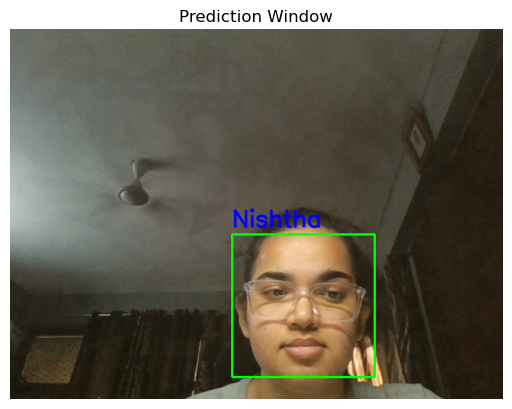

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [6]:
# Data preparation
dataset_path = "./dataset/"
faceData = []
labels = []
nameMap = {}

classId = 0

# Load saved face data
for f in os.listdir(dataset_path):
    if f.endswith(".npy"):
        nameMap[classId] = f[:-4]
        dataItem = np.load(os.path.join(dataset_path, f))
        m = dataItem.shape[0]
        faceData.append(dataItem)
        
        # Create labels (class IDs)
        target = classId * np.ones((m,))
        classId += 1
        labels.append(target)

# Convert faceData and labels to numpy arrays
XT = np.concatenate(faceData, axis=0)
yT = np.concatenate(labels, axis=0).reshape((-1, 1))

print("Loaded data shapes:")
print(XT.shape)
print(yT.shape)
print(nameMap)

# k-NN Algorithm
def dist(p, q):
    return np.sqrt(np.sum((p - q)**2))

def knn(X, y, xt, k=5):
    m = X.shape[0]
    dlist = []

    # Calculate distance from xt to each point in X
    for i in range(m):
        d = dist(X[i], xt)
        dlist.append((d, y[i]))

    # Sort by distance and pick k nearest neighbors
    dlist = sorted(dlist)
    dlist = np.array([item[1] for item in dlist[:k]])

    # Return the most common label among the k nearest neighbors
    labels, counts = np.unique(dlist, return_counts=True)
    idx = counts.argmax()
    pred = labels[idx]

    return int(pred)

# Face Recognition using k-NN and webcam
cam = cv2.VideoCapture(0)

model = cv2.CascadeClassifier("C:\\Users\\Nishtha\\Downloads\\haarcascade_frontalface_alt.xml")

plt.ion()  # Turn on interactive mode for continuous plotting

while True:
    success, img = cam.read()
    if not success:
        print("Reading camera failed!")

    faces = model.detectMultiScale(img, 1.3, 5)
    
    for f in faces:
        x, y, w, h = f
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Convert to grayscale and resize the detected face for prediction
        cropped_face = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
        cropped_face = cv2.resize(cropped_face, (100, 100))
        
        # Predict the person in the cropped face using k-NN
        classPredicted = knn(XT, yT, cropped_face.flatten())
        
        # Get the predicted name from nameMap
        namePredicted = nameMap[classPredicted]
        
        # Display the name and bounding box around the face
        cv2.putText(img, namePredicted, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Prediction Window")
    plt.axis("off")
    plt.draw()
    plt.pause(0.001)  # Pause for a short time to update the plot

    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cam.release()
plt.ioff()  # Turn off interactive mode
plt.show()


In [7]:
cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
